 # **Ground state Energy estimation of Harmonic Oscillator**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def trial_wavefunction(alpha,x):
    norm=alpha/(5*(np.pi))
    wavefunction=norm*(np.exp(-((alpha**2)*x**2)/2))
    return wavefunction
    

In [6]:
def energy(alpha,x):
    energy=alpha**2 + (x**2)*(1-alpha**4)
    return energy

In [10]:
def metropolis(samples,step_size,alpha):
    x_current=0
    sample_x=np.zeros(samples)
    for i in range(samples):
        x_new = x_current + np.random.uniform(-step_size,step_size)
        acceptance_ratio = (trial_wavefunction(alpha,x_new)**2)/(trial_wavefunction(alpha,x_current)**2)
        if  np.random.rand() < acceptance_ratio:
            x_current = x_new
        sample_x[i] = x_current
    return sample_x
            

In [13]:
def variational_monte(samples,step_size,alpha):
    sample = metropolis(samples,step_size,alpha)
    E = energy(alpha,sample[samples // 2:])
    return np.mean(E),np.var(E)

In [14]:
samples = int(1e5)
step_size = 2.0
Energy_list = []
Variance_list = []
alpha = np.linspace(0.5,1.5,11)
for i in alpha:
    E_,E__ = variational_monte(samples,step_size,i)
    Energy_list.append(E_)
    Variance_list.append(E__)
    

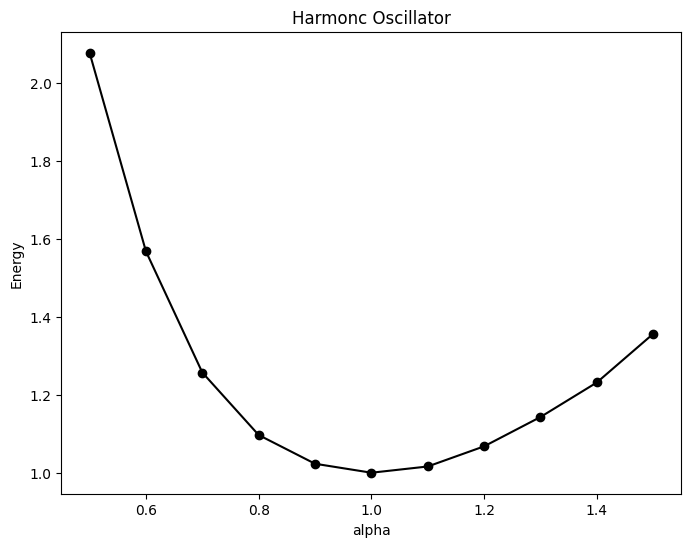

In [29]:
plt.figure(figsize=(8,6))
plt.plot(alpha,Energy_list,marker='o',color='black')
plt.xlabel('alpha')
plt.ylabel('Energy')
plt.title("Harmonc Oscillator")
plt.savefig("plotho.png")

In [ ]:
matrix=np.zeros((len(alpha),3))
for i in range(len(alpha)):
        matrix[i,0]=alpha[i]
for i in range(len(alpha)):
        matrix[i,1]=Energy_list[i]
for i in range(len(alpha)):
        matrix[i,2]=Variance_list[i] 
        

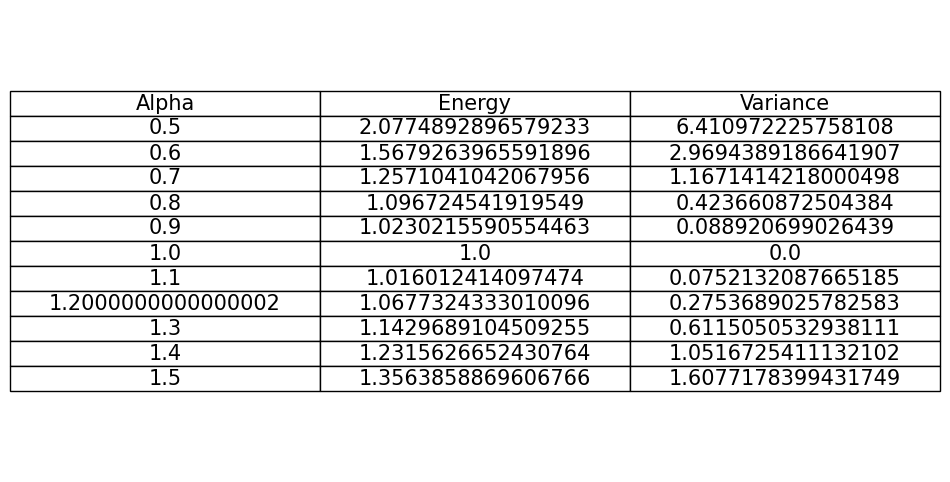

<Figure size 640x480 with 0 Axes>

In [39]:
# Data array (numerical values)# Header row (alphabets)
header = ["Alpha", "Energy", "Variance"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(cellText=matrix, 
                 colLabels=header, 
                 loc='center', 
                 cellLoc='center')

# Adjust font size and layout
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1.5, 1.5)  # Adjusts table size


# Show table
plt.show()
plt.savefig("plotto.png")
